In [10]:
df=read.csv(file='C:\\Users\\abine\\Dropbox\\Projects\\R Reg ana\\IMDB-Movie-Data.csv',header = TRUE, stringsAsFactors = FALSE)
head(df)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,Metascore
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76
2,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65
3,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62
4,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59
5,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40
6,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42


Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

In [11]:
summary(df)

      Rank           Title              Genre           Description       
 Min.   :   1.0   Length:1000        Length:1000        Length:1000       
 1st Qu.: 250.8   Class :character   Class :character   Class :character  
 Median : 500.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 500.5                                                           
 3rd Qu.: 750.2                                                           
 Max.   :1000.0                                                           
                                                                          
   Director            Actors               Year      Runtime..Minutes.
 Length:1000        Length:1000        Min.   :2006   Min.   : 66.0    
 Class :character   Class :character   1st Qu.:2010   1st Qu.:100.0    
 Mode  :character   Mode  :character   Median :2014   Median :111.0    
                                       Mean   :2013   Mean   :113.2    
                                       3

In [12]:
str(df)

'data.frame':	1000 obs. of  12 variables:
 $ Rank              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title             : chr  "Guardians of the Galaxy" "Prometheus" "Split" "Sing" ...
 $ Genre             : chr  "Action,Adventure,Sci-Fi" "Adventure,Mystery,Sci-Fi" "Horror,Thriller" "Animation,Comedy,Family" ...
 $ Description       : chr  "A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control "| __truncated__ "Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize the"| __truncated__ "Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before t"| __truncated__ "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing compe"| __truncated__ ...
 $ Director          : chr  "James Gunn" "Ridley Scott" "M. Night Shyamalan" "Christophe Lourdelet" ...
 $ Actors            : chr  "Chris Pra

From above output we can see that there are 1000 observations or row and 12 variables or columns in imdb dataframe that we created in our first code block.

## DATA CLEANING

Let us check the column names in our dataset

In [13]:
colnames(df)

[1] "Rank"               "Title"              "Genre"             
 [4] "Description"        "Director"           "Actors"            
 [7] "Year"               "Runtime..Minutes."  "Rating"            
[10] "Votes"              "Revenue..Millions." "Metascore"

Here two column names at index 8 and 11 looks too long. Let's rename these two.

In [14]:
colnames(df)[c(8,11)] <- c("Runtime", "Revenue")
colnames(df)

[1] "Rank"        "Title"       "Genre"       "Description" "Director"   
 [6] "Actors"      "Year"        "Runtime"     "Rating"      "Votes"      
[11] "Revenue"     "Metascore"

In [15]:
library(ggplot2)
library(d3Tree)
library(dplyr)
library(wordcloud)
library(Amelia)
library(corrgram)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'd3Tree' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'Amelia' was built under R version 3.6.2"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.6.2"## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'corrgram' was built under R version 3.6.2"Registered S3 method overwritten by 'ser

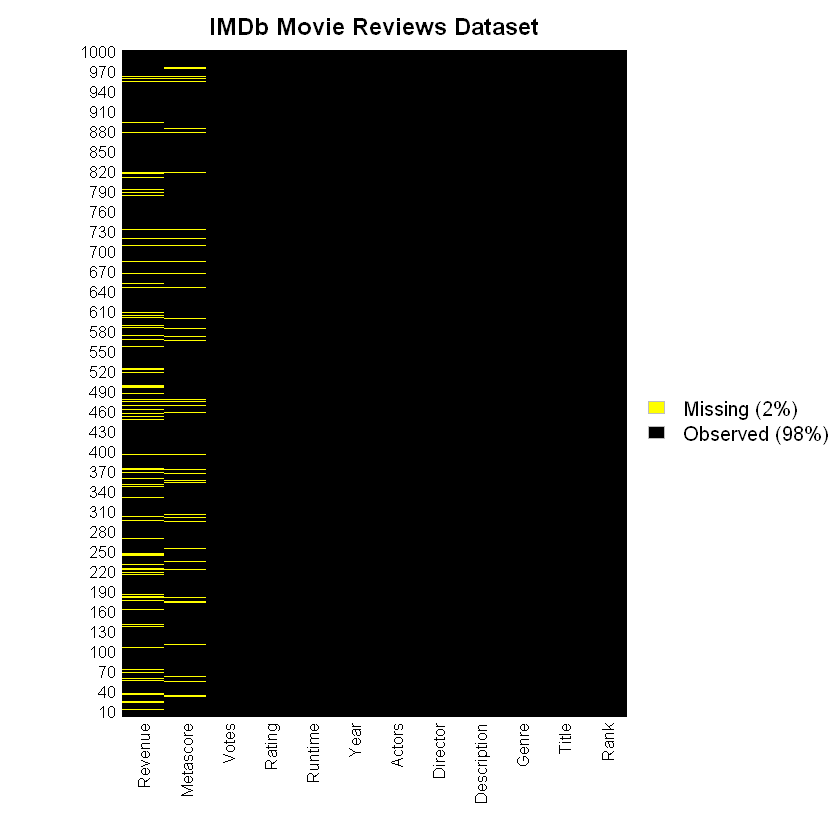

In [16]:
missmap(df,main="IMDb Movie Reviews Dataset",col=c("yellow","black"),legend=TRUE)

In [17]:
nrow(df)

[1] 1000

In [18]:
sum(is.na(df))

[1] 192

We have to remove these rows because, replacing(imputing) some value with revenue or metascire is not logical

In [19]:
df=na.omit(df)

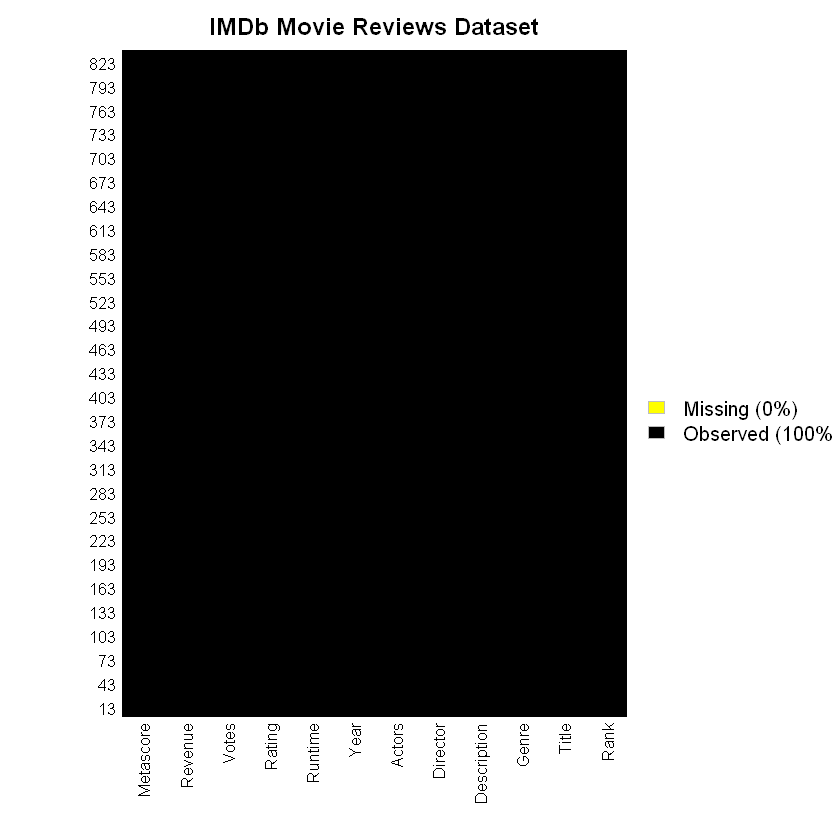

In [20]:
missmap(df,main="IMDb Movie Reviews Dataset",col=c("yellow","black"),legend=TRUE)

## EDA

Number of Movies per year

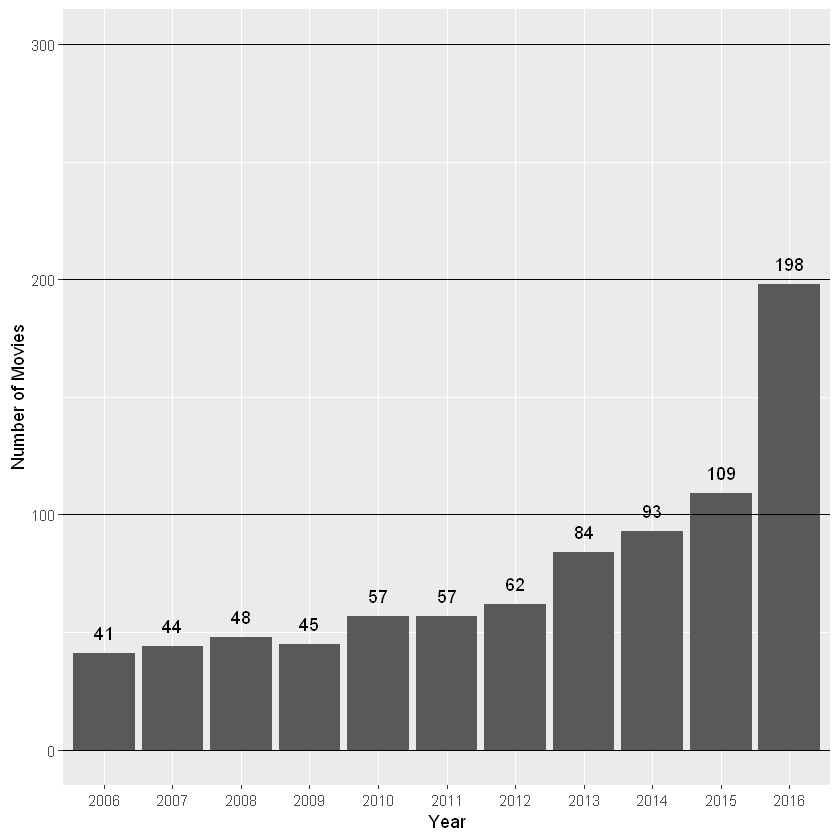

In [21]:
ggplot(data = df, aes(x = factor(Year))) + geom_bar(stat = 'count') + geom_text(stat = 'count', aes(label = ..count..), vjust = -1) + geom_hline(yintercept = c(0,100,200,300)) + xlab("Year") + ylab("Number of Movies")

Positive trend in number of movie release every year

Lets have a glance at the Revenue of Movies each year

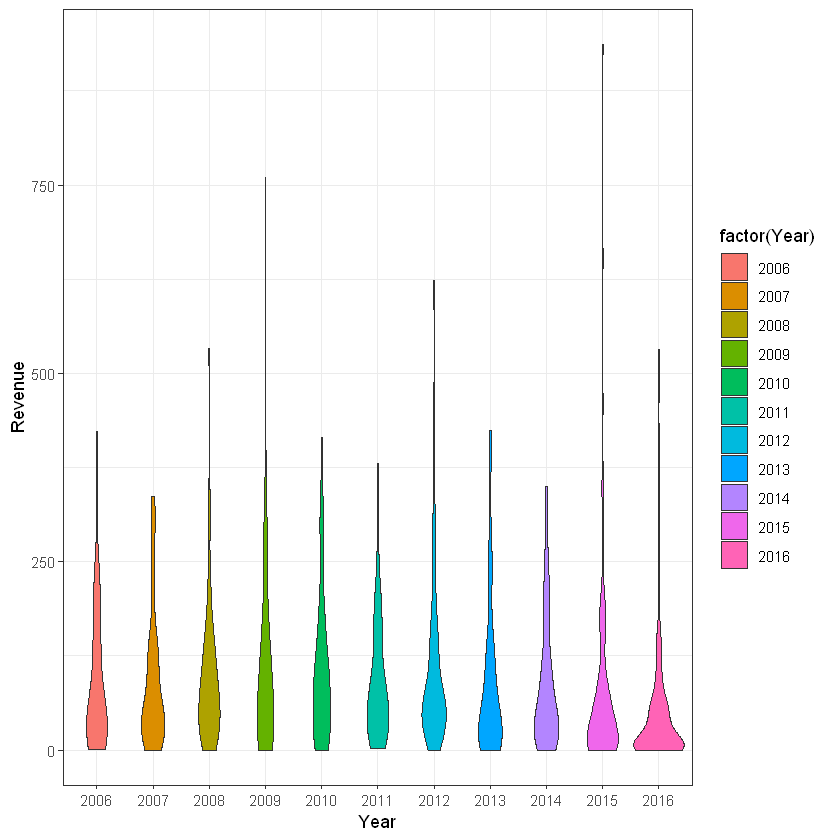

In [22]:
ggplot(data = df, aes(x = factor(Year), y = Revenue, fill = factor(Year)))+ geom_violin() + xlab("Year") + theme_bw()

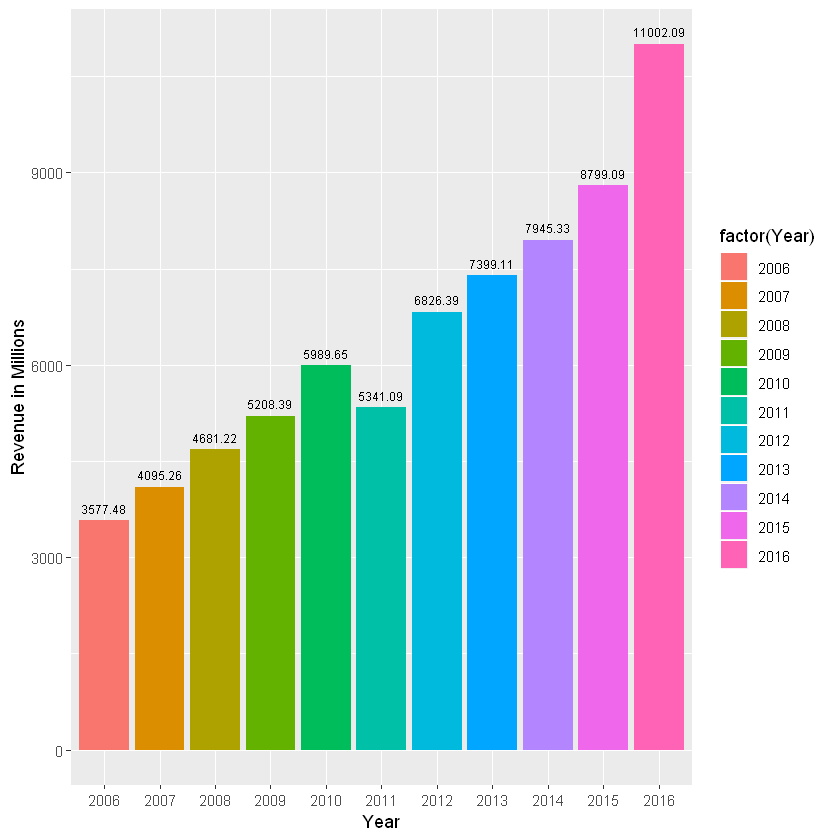

In [23]:
year_revenue<-aggregate(Revenue~Year, data = df , sum)
ggplot(data = year_revenue, aes(factor(Year), Revenue, fill = factor(Year))) + 
  geom_bar(stat = 'identity') +
  geom_text(aes(label = Revenue), vjust = -0.75, cex = 2.5) + 
  xlab("Year") + ylab("Revenue in Millions")

Revenue of movies is increasing Year by Year

Let us also see how the ratings affect the Revenue of Movies. But first we must do some processing to club the ratings into intervals.

In [24]:
newdf=df
rr<- aggregate(Revenue~Rating, data = newdf, sum)
rr$Rating_Interval<- cut(rr$Rating, breaks = seq(from = 1, to = 10, by = 1))
head(rr)

,Rating,Revenue,Rating_Interval
,<dbl>,<dbl>,<fct>
1,1.9,14.17,"(1,2]"
2,2.7,9.35,"(2,3]"
3,3.9,95.46,"(3,4]"
4,4.0,20.76,"(3,4]"
5,4.1,166.15,"(4,5]"
6,4.3,160.27,"(4,5]"


Now we can create a boxplot to see how the ratings have affected the Revenue.

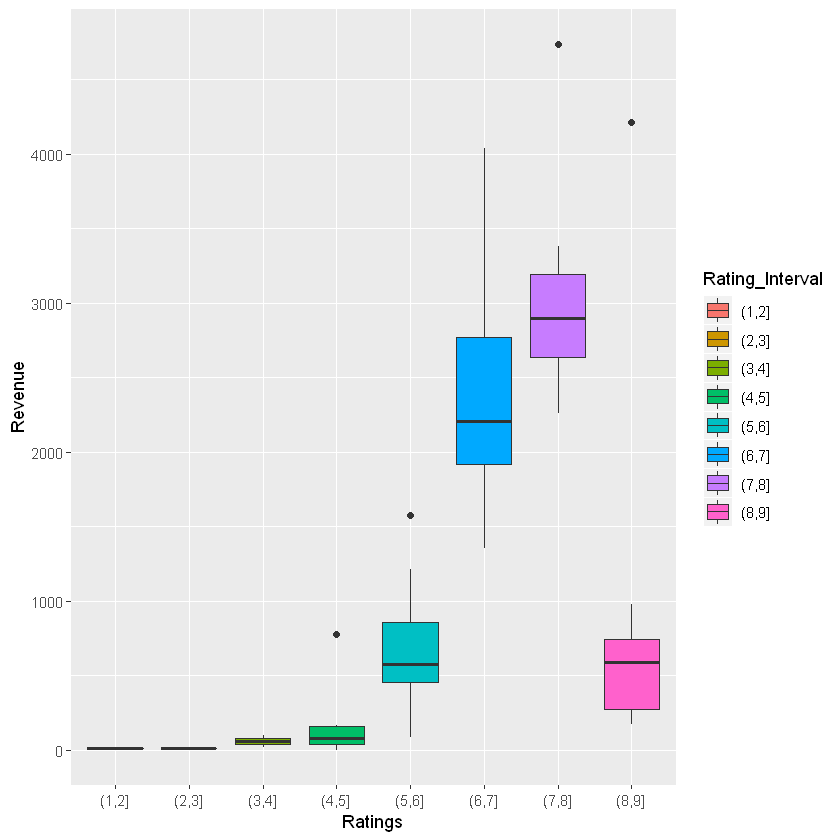

In [25]:
ggplot(data = rr, aes(x = factor(Rating_Interval), y = Revenue, fill = Rating_Interval)) + geom_boxplot() + xlab("Ratings")

Movies rated between 6-8 made a lot of Revenue.

To further drilldown into this we must also see how many movies were categorised in all interval ranges

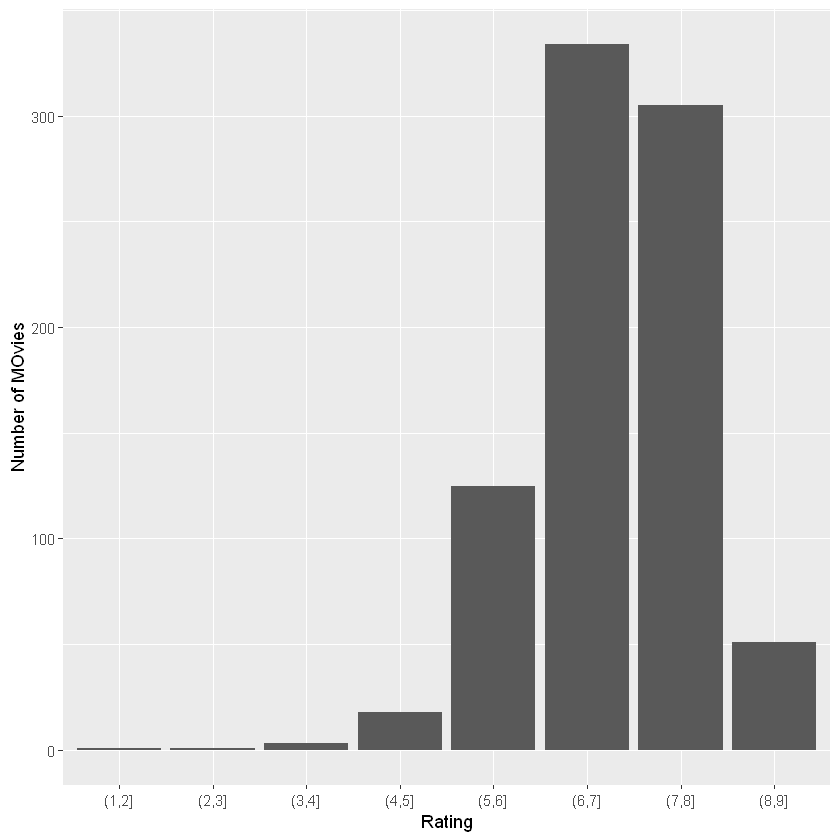

In [26]:
newdf$ri<- cut(newdf$Rating, breaks = seq(1,10, by =1))
rc <- newdf %>% group_by(ri) %>% count(ri)
ggplot(data =  rc, aes(x = ri, y = n)) + geom_bar(stat = 'identity') + 
  xlab("Rating") + ylab("Number of MOvies")

Now it is clear that maximum number of movie ratings ranges between 6-8. Hence the Revenue is more for the movies in this range of ratings. This clearly indicates that Revenues is directly proportional to the Ratings received.

Let us now check the data with respect to Genre of movies

In [27]:
w<-unique(unlist(strsplit(unique(df$Genre), ",")))
w

[1] "Action"    "Adventure" "Sci-Fi"    "Mystery"   "Horror"    "Thriller" 
 [7] "Animation" "Comedy"    "Family"    "Fantasy"   "Drama"     "Music"    
[13] "Biography" "Romance"   "History"   "Western"   "Crime"     "War"      
[19] "Musical"   "Sport"

In [28]:
wc<- function(x){
  length(grep(x, df$Genre))
}

In [29]:
genrecount<- as.data.frame(sapply(w,wc))
genrecount$genre <- rownames(genrecount)
colnames(genrecount)<- c("count","genre")
genrecount<- arrange(genrecount, desc(count))
genrecount

count,genre
<int>,<chr>
419,Drama
277,Action
250,Comedy
244,Adventure
148,Thriller
126,Crime
120,Romance
107,Sci-Fi
92,Fantasy


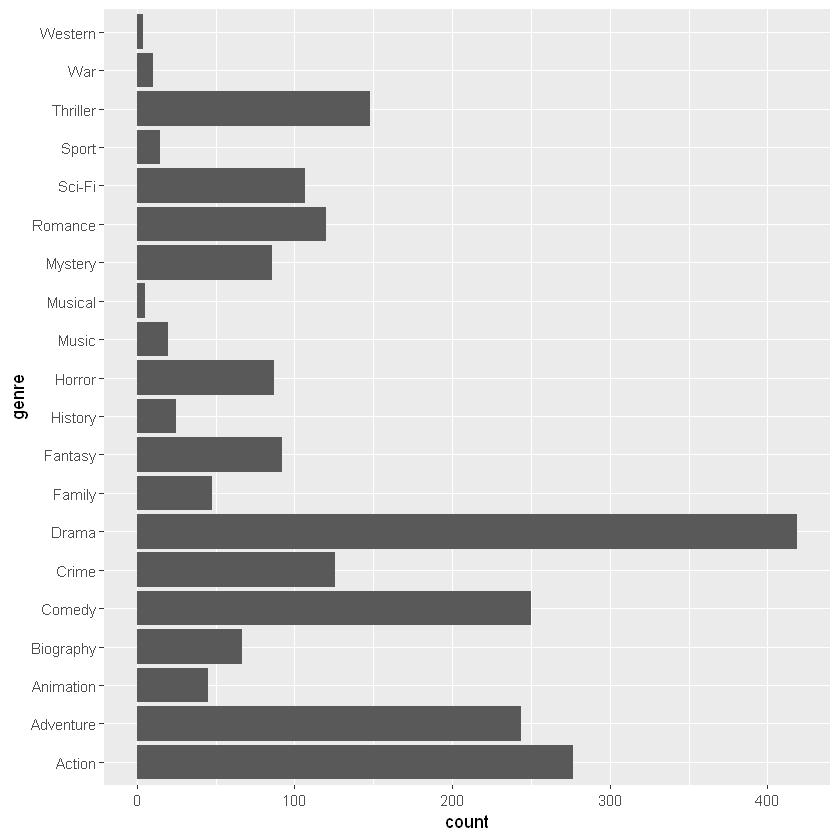

In [30]:
ggplot(data = genrecount, aes(x = genre, y = count)) + 
  geom_bar(stat = 'identity') + 
  coord_flip()

From above bar graph it is clear that Drama and Action movies are fairly popular, followed by Comedy and Adventure.

In [31]:
RevSum<- function(x){
  sum(newdf[(grep(x,newdf$Genre)), "Revenue"])  
}

In [32]:
rev<-as.data.frame(sapply(w,RevSum))
rev$genre <- rownames(rev)
colnames(rev)[1] <- "Revenue"

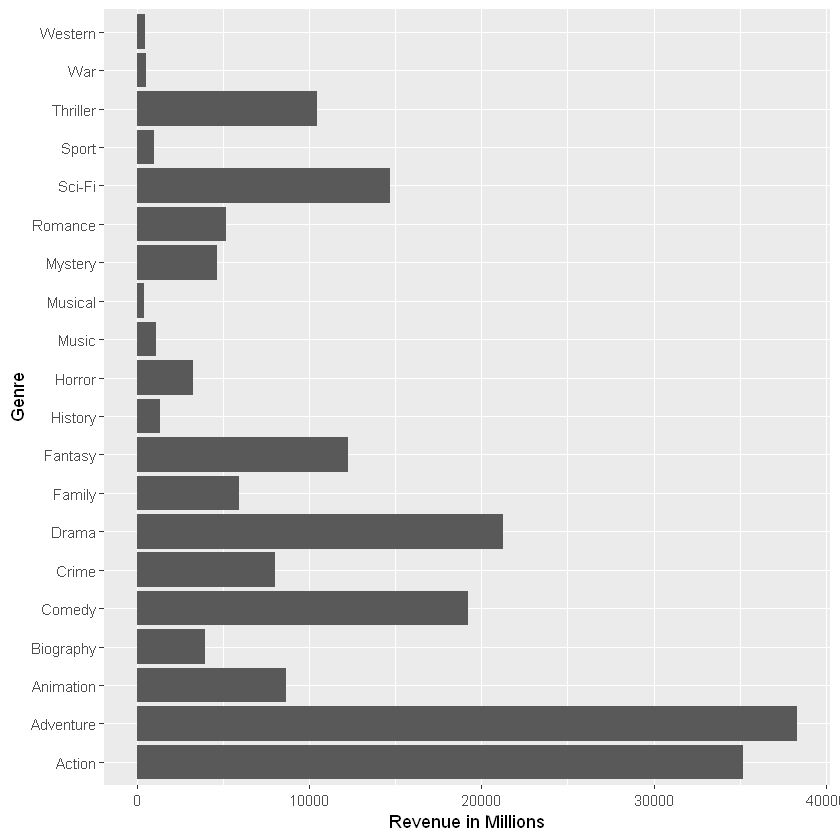

In [33]:
ggplot(data = rev, aes(x = genre, y = Revenue)) + 
  geom_bar(stat = 'identity') +
  xlab("Genre") + ylab("Revenue in Millions") +
  coord_flip()

Above grapgh clearly visualises the distribution of Revenue by Genre of the movie.

Action and Adventure movies bring most Revenue.

Top genres in count

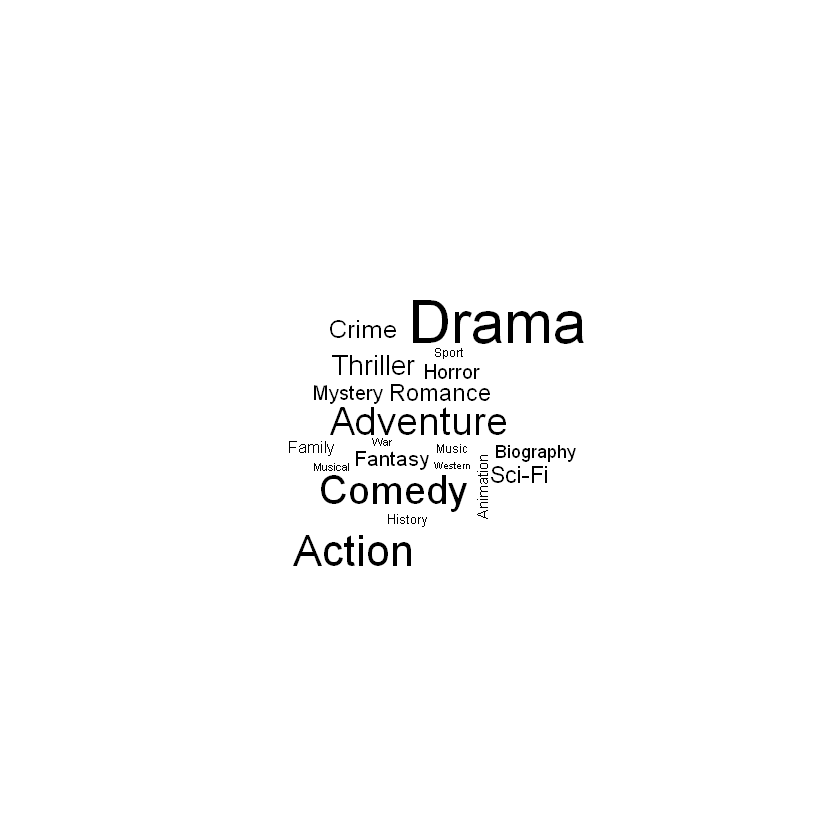

In [34]:
wordcloud(genrecount$genre, genrecount$count, scale = c(3,0.5))

Drama, Action, Comedy are released a lot compared to other genres

## CORRELATION

In [35]:
num.cols=sapply(df,is.numeric)
cor.data=cor(df[,num.cols])
cor.data

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.0000000,-0.31280879,-0.2547829,-0.2431251,-0.3032835,-0.2731696,-0.19590921
Year,-0.3128088,1.00000000,-0.1019331,-0.1457032,-0.3624448,-0.1291979,-0.06230291
Runtime,-0.2547829,-0.10193313,1.0000000,0.3745658,0.3992982,0.2817207,0.22139693
Rating,-0.2431251,-0.14570318,0.3745658,1.0000000,0.5174521,0.2171058,0.67273115
Votes,-0.3032835,-0.36244483,0.3992982,0.5174521,1.0000000,0.6368333,0.33267386
Revenue,-0.2731696,-0.12919791,0.2817207,0.2171058,0.6368333,1.0000000,0.14239688
Metascore,-0.1959092,-0.06230291,0.2213969,0.6727311,0.3326739,0.1423969,1.00000000


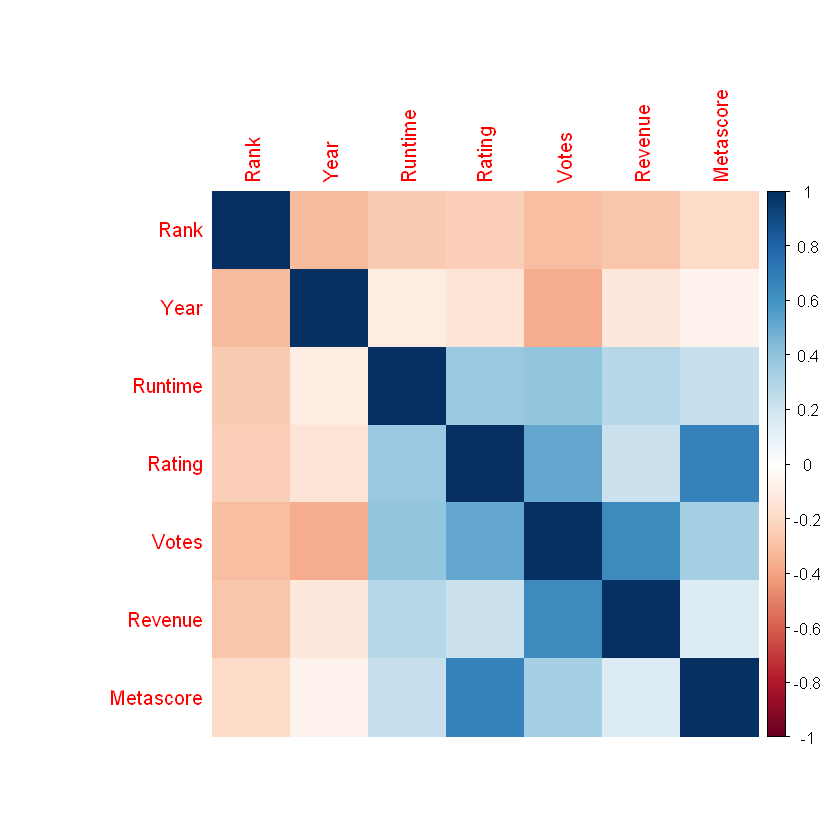

In [36]:
corrplot(cor.data,method='color')

Ratings is positively correlated with Metascore and Votes and negatively correlated with rank

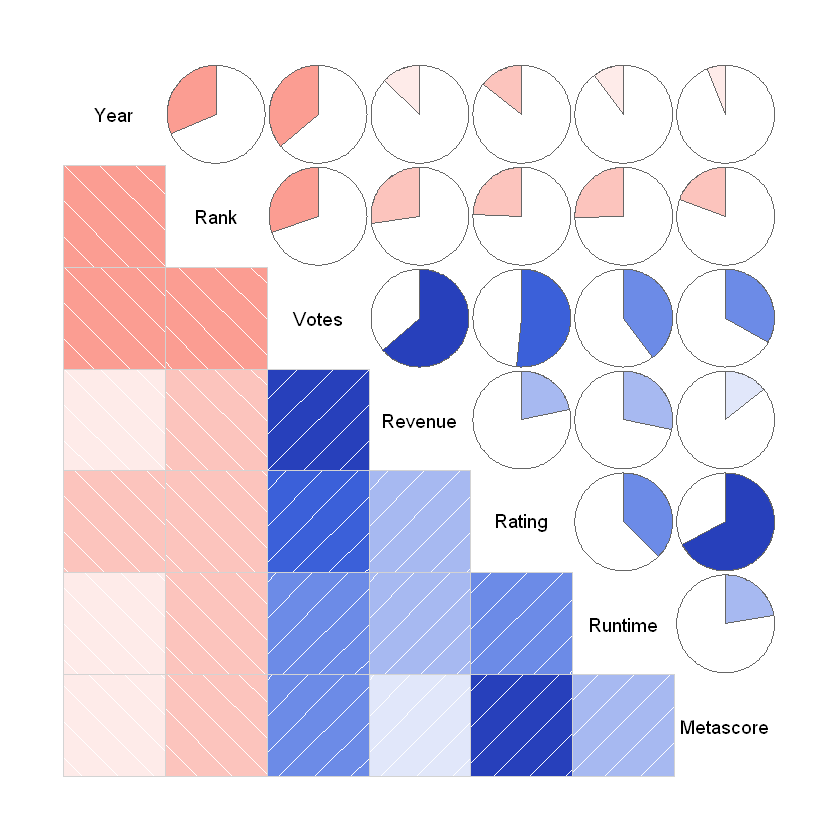

In [37]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt)

Different Visual Representation of the above graph

# REGRESSION MODEL - MULTIPLE LINEAR REGRESSION

Our objective is to predic the rating of the movie given by its viewrs

In [38]:
library(caTools)

sample=sample.split(df$Rating,SplitRatio = 0.70)

train=subset(df,sample==TRUE)
test=subset(df,sample==FALSE)

In [39]:
model=lm(Rating~Year+Runtime+Votes+Revenue+Metascore+Rank,train)

summary(model)


Call:
lm(formula = Rating ~ Year + Runtime + Votes + Revenue + Metascore + 
    Rank, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2822 -0.2935  0.0243  0.3458  1.9714 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.511e+01  1.949e+01  -0.776    0.438    
Year         9.557e-03  9.659e-03   0.989    0.323    
Runtime      7.183e-03  1.425e-03   5.042 6.17e-07 ***
Votes        1.706e-06  1.947e-07   8.763  < 2e-16 ***
Revenue     -1.322e-03  2.973e-04  -4.447 1.04e-05 ***
Metascore    2.808e-02  1.544e-03  18.187  < 2e-16 ***
Rank        -7.736e-05  1.044e-04  -0.741    0.459    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5889 on 580 degrees of freedom
Multiple R-squared:  0.5705,	Adjusted R-squared:  0.5661 
F-statistic: 128.4 on 6 and 580 DF,  p-value: < 2.2e-16


INTERPRETATION


• Here Rating is the dependent variable we want to predict 


Rating is a value which is the average of all the ratings by users for that movie

• Here, we have the intercept and coefficients for value (Estimate)


• Residuals is difference between observed and predicted value of dependent variable 


• Higher the number of *’s indicates higher the significance level(It’s based on p-value. Lesser the p-value, more the stars)


• Here Runtime,Votes,Metascore and Revenue has high significance level


• p-value is the probability of a variable being not relevant


• t value shows how many S.D’s the  Coefficient is away from Zero 

In [40]:
res=residuals(model)

res=as.data.frame(res)
head(res)

,res
,<dbl>
1,0.111641874
2,-0.492343139
3,0.479344352
5,-0.201454758
6,-0.007896558
7,0.374767597


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


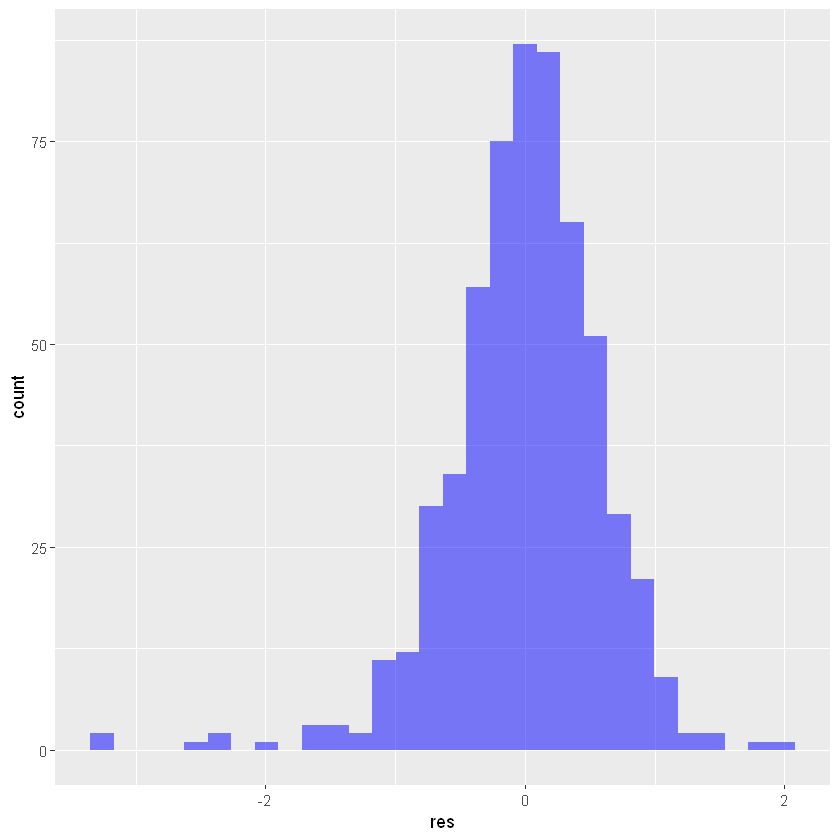

In [41]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

Plotting Residuals to check whether its Normal Distribution

In [42]:
Rating.predictions=predict(model,test)
head(Rating.predictions)

4       10       15       16       21       22 
6.331314 6.332560 6.911587 6.208009 6.412462 7.997302

In [43]:
results=cbind(Rating.predictions,test$Rating)
colnames(results)=c('pred','real')
results=as.data.frame(results)
head(results)

,pred,real
,<dbl>,<dbl>
4,6.331314,7.2
10,6.332560,7.0
15,6.911587,6.4
16,6.208009,6.6
21,6.412462,6.7
22,7.997302,7.9


In [44]:
to_zero=function(x){
  if (x<0){
    return(0)
  }else{
    return(x)
  }
}

In [45]:
results$pred=sapply(results$pred,to_zero)
head(results)

,pred,real
,<dbl>,<dbl>
4,6.331314,7.2
10,6.332560,7.0
15,6.911587,6.4
16,6.208009,6.6
21,6.412462,6.7
22,7.997302,7.9


In [46]:
mse=mean((results$real-results$pred)^2)
print(mse)

mse^0.5

[1] 0.287368


[1] 0.5360672

• This is a RMSE value.RMSE is a measure of how spread out these residuals are. In other words, it tells you how con centrated the data is around the line of best fit

In [47]:
SSE=sum((results$pred-results$real)^2)
SST=sum((mean(df$Rating)-results$real)^2)
R2=1-SSE/SST
R2

[1] 0.5913076

• R-squared is a goodness-of-fit measure for linear regression models.


• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. 


• this model can explain only 61% of the variation.

From this, we can understand that, these all datapoints are not enough predict the Rating of Movie by users

This means that there is a lot of oppurtunities to improve the prediction of ratings.